In [17]:
import pandas as pd
import numpy as np
import rasterio as rio 
import os
import pkg_resources


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

from ShallowLearn import LoadData
from ShallowLearn.band_mapping import band_mapping



import seaborn as sns

import matplotlib.pyplot as plt 


In [2]:
def preprocess_data(data):
    loaded_data = LoadData.LoadFromCSV(data)
    specific_reef = loaded_data.load_specific_reef(6880)
    return np.array(specific_reef)

def reshape_data(data):
    # shape = data.shape
    dim_0 = data.shape[0] * data.shape[2] * data.shape[3] 
    channels = data.shape[1]
    return data.reshape(dim_0, channels)


In [3]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())


(20906100, 13)


In [4]:
#X_train = X_train.drop_duplicates()


In [5]:
#sns.pairplot(X_train, corner = True)

In [6]:
from sklearn import manifold

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn import decomposition

In [9]:
X_train.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = X_train.loc[~(X_train==0).any(axis=1)]

In [11]:
scaler = StandardScaler()

In [12]:
pixel_df = scaler.fit_transform(X_train)
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
# pca = decomposition.PCA(n_components = 2, random_state = 42)
# pca_data = pca.fit_transform(sample_data)
# pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [13]:
sample_data = pixel_df.sample(25_000, random_state = 42)


In [14]:
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

In [15]:
_ = kernel_pca.fit(sample_data)


In [16]:
tf_data = kernel_pca.transform(sample_data)

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


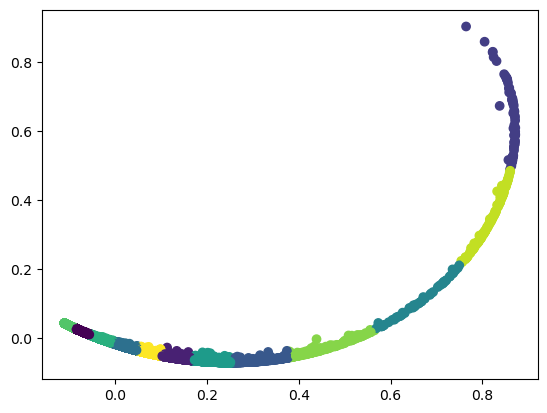

In [18]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(tf_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(tf_data[:, 0], tf_data[:, 1], c=labels)
plt.show()

In [19]:
# pixel_df = pd.DataFrame(kernel_pca.inverse_transform(tf_data), columns = band_mapping.keys())

In [20]:
sample_data = pixel_df

In [31]:
tsne = manifold.TSNE(n_components = 2,learning_rate=150, perplexity = 25, random_state = 42, verbose = 2, n_iter = 2000,early_exaggeration=12, n_jobs=-1)
transformed_data = tsne.fit_transform(sample_data)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 25000 samples in 0.025s...
[t-SNE] Computed neighbors for 25000 samples in 0.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25000
[t-SNE] Computed conditional probabilities for sample 2000 / 25000
[t-SNE] Computed conditional probabilities for sample 3000 / 25000
[t-SNE] Computed conditional probabilities for sample 4000 / 25000
[t-SNE] Computed conditional probabilities for sample 5000 / 25000
[t-SNE] Computed conditional probabilities for sample 6000 / 25000
[t-SNE] Computed conditional probabilities for sample 7000 / 25000
[t-SNE] Computed conditional probabilities for sample 8000 / 25000
[t-SNE] Computed conditional probabilities for sample 9000 / 25000
[t-SNE] Computed conditional probabilities for sample 10000 / 25000
[t-SNE] Computed conditional probabilities for sample 11000 / 25000
[t-SNE] Computed conditional probabilities for sample 12000 / 25000
[t-SNE] Computed conditional probabilities for sam

In [29]:
#copy_tf = transformed_data.copy()

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


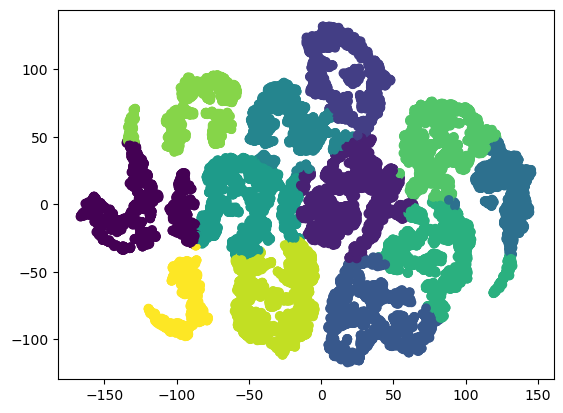

In [52]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

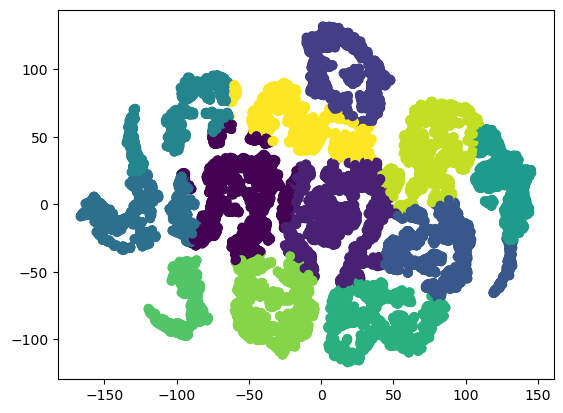

In [35]:
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture Model with 14 components
gmm = GaussianMixture(n_components=12, random_state=42)
gmm.fit(transformed_data)
labels = gmm.predict(transformed_data)

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [37]:
from sklearn.cluster import OPTICS

# Create an OPTICS object
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the OPTICS model to the transformed data
optics.fit(transformed_data)



OPTICS(min_cluster_size=0.1)

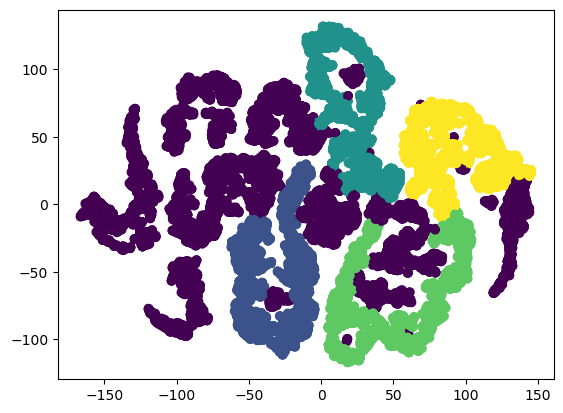

In [38]:
# Retrieve the cluster labels and core sample indices
labels = optics.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [39]:
len(np.unique(labels))

5

In [40]:
# import matplotlib.pyplot as plt 
# kmeans = KMeans(n_clusters=14, random_state=42)
# kmeans.fit(transformed_data)
# labels = kmeans.labels_

# # Create a 3D scatter plot of the t-SNE clusters
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=labels, cmap='viridis')
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)

# ax.set_xlabel("t-SNE Dimension 1")
# ax.set_ylabel("t-SNE Dimension 2")
# ax.set_zlabel("t-SNE Dimension 3")

# plt.title("t-SNE Clustering with K-means Labels")
# plt.show()

# # Create a pairplot to visualize pairwise relationships
# data_with_tsne = np.concatenate([sample_data, transformed_data], axis=1)
# data_with_tsne = np.column_stack([data_with_tsne, labels])

# labels_names = ['Feature ' + str(i+1) for i in range(13)] + ['t-SNE Dimension 1', 't-SNE Dimension 2', 't-SNE Dimension 3', 'Cluster']
# df = pd.DataFrame(data_with_tsne, columns=labels_names)

# sns.pairplot(df, vars=labels_names[:-1], hue='Cluster', plot_kws={'alpha': 0.5})
# plt.suptitle('Pairwise Relationships with t-SNE Clusters (K-means Labels)')
# plt.show()

In [19]:
from xgboost import XGBClassifier

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
sample_data

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12
971639,-0.638254,-0.636966,-0.634772,-0.629047,-0.622490,-0.617793,-0.615002,-0.614966,-0.617581,-0.619292,-0.619203,-0.619114,-0.619976
4598299,-0.257706,-0.251844,-0.239633,-0.242797,-0.250603,-0.249507,-0.262939,-0.259355,-0.256655,-0.265686,-0.269327,-0.278360,-0.288374
8862837,-0.536595,-0.547884,-0.551964,-0.548015,-0.542350,-0.534051,-0.529463,-0.530340,-0.531175,-0.530215,-0.532858,-0.537297,-0.536402
3731501,-0.711125,-0.708951,-0.707679,-0.706477,-0.707132,-0.706038,-0.703243,-0.702293,-0.703087,-0.704769,-0.706447,-0.709023,-0.710740
4836919,0.515087,0.663269,0.817072,0.861931,0.796622,0.851750,1.027360,1.308034,1.692884,1.820860,1.691415,1.405632,0.963449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858759,-0.434035,-0.433607,-0.433152,-0.433671,-0.434295,-0.436802,-0.434919,-0.431309,-0.430368,-0.432141,-0.433023,-0.432104,-0.429462
5298007,0.264087,0.261951,0.262617,0.265900,0.267156,0.268255,0.269208,0.270010,0.268982,0.266073,0.264031,0.262891,0.258905
1015550,7.379360,7.284115,7.274315,7.292223,7.334800,7.341335,7.309574,7.210277,7.101371,7.130349,6.996214,6.921537,6.866695
8046947,-0.725520,-0.725148,-0.724781,-0.725384,-0.726042,-0.726749,-0.726654,-0.727501,-0.727389,-0.727263,-0.727134,-0.727005,-0.726916


In [22]:
X_train.drop(columns = ["B10"], axis = 1, inplace = True)

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
sample_data.drop(columns = ['B10'], axis = 1, inplace = True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(sample_data,labels, test_size=.2)

In [26]:
#scaler = StandardScaler().fit(X_train)

In [27]:
classes = len(np.unique(labels))

In [28]:
bst = XGBClassifier(n_estimators=10, max_depth=8, learning_rate=1, objective='multi:softmax', num_class=classes)

In [29]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_class=12, num_parallel_tree=1, objective='multi:softmax', ...)

In [30]:
preds = bst.predict(X_test)

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
bst.predict_proba(X_test).shape

(5000, 12)

In [33]:
roc_auc_score(y_test, bst.predict_proba(X_test), multi_class='ovo')

0.9981251216337268

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, preds)

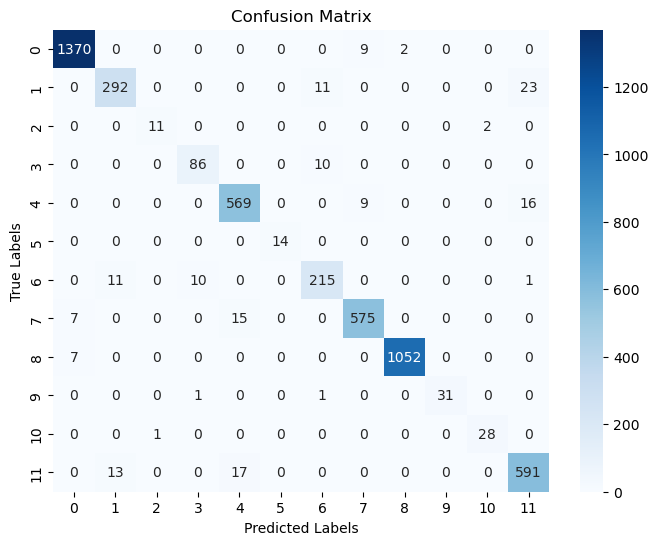

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [37]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [38]:
from ShallowLearn import ImageHelper

In [39]:
img_test = ImageHelper.load_img(dir_list[13])

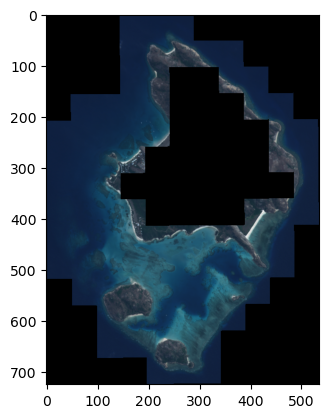

In [40]:
ImageHelper.plot_rgb(img_test, plot = True)

In [41]:
img_test = ImageHelper.remove_channel(img_test, 10)

In [42]:
original_shape = img_test.shape

In [43]:
original_shape

(725, 534, 12)

In [44]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [45]:
test_pred = bst.predict(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

In [47]:
def plot_discrete_color(data, class_labels):
    """
    Generates a discrete color plot using matplotlib, where each value represents a different class.

    Arguments:
    data -- 2D array-like object representing the class labels for each point.
    class_labels -- 1D array-like object containing the unique class labels.

    Returns:
    None (Displays the plot)
    """
    # Define colormap for classes
    cmap = plt.get_cmap('tab10')

    # Create figure and axes
    fig, ax = plt.subplots()

    # Create color plot
    im = ax.imshow(data, cmap=cmap)

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax, cmap=cmap)

    # Set ticks and tick labels
    cbar.set_ticks(class_labels)
    cbar.set_ticklabels(class_labels)

    # Set title and labels
    ax.set_title("Discrete Color Plot")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    # Show the plot
    plt.show()


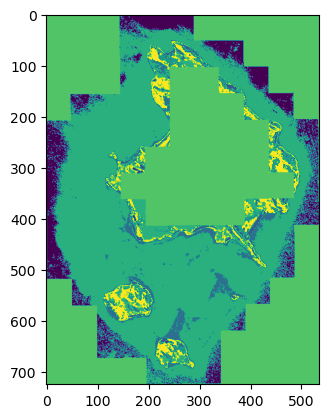

In [48]:
plt.imshow(test_pred)

In [49]:
test_pred = bst.predict_proba(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


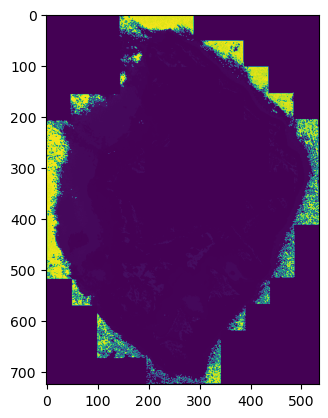

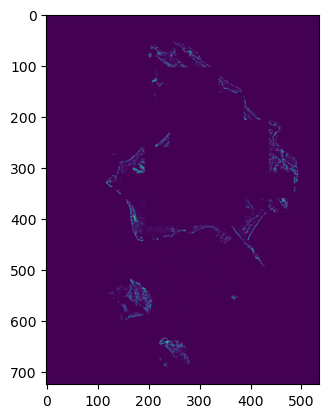

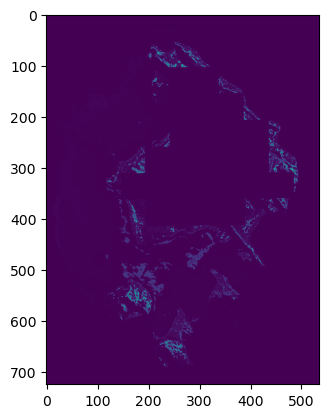

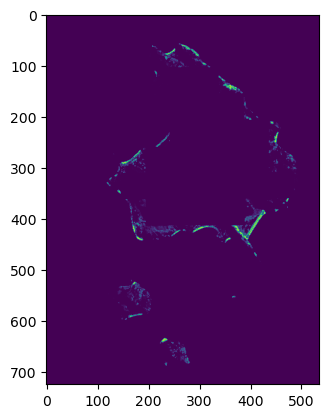

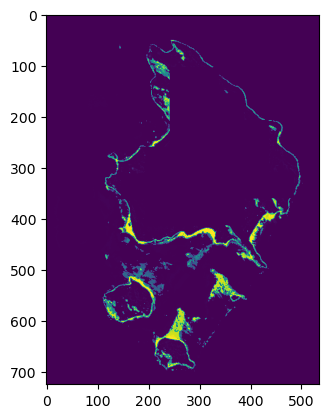

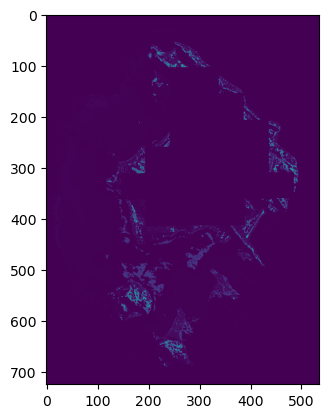

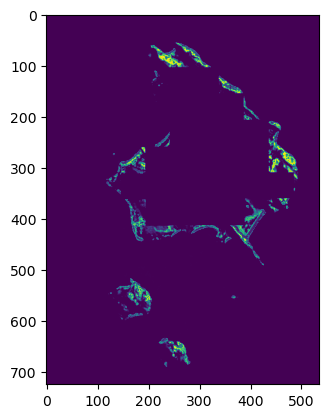

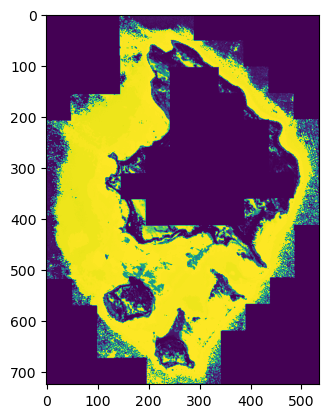

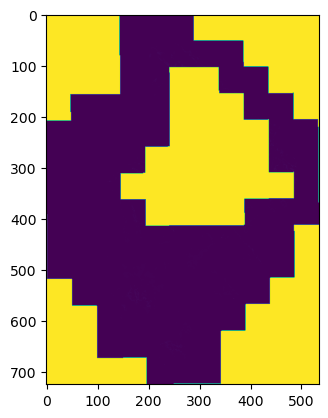

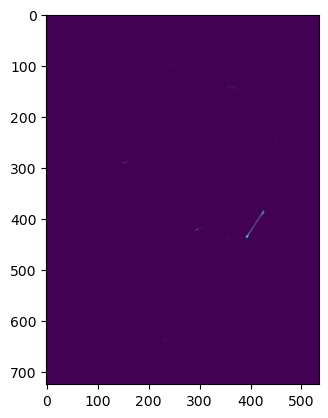

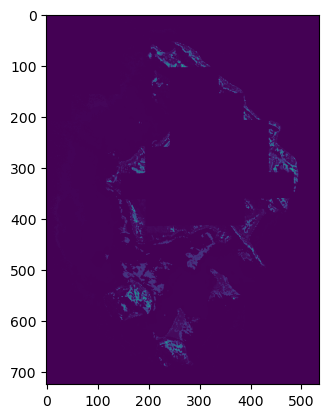

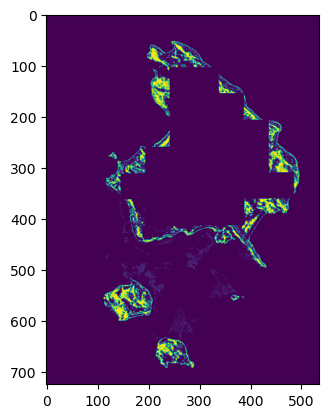

In [50]:
for i in range(test_pred.shape[1]):
    plt.imshow(test_pred[:,i].reshape(original_shape[0], original_shape[1]))
    plt.show()

In [51]:

# specify the directory path
dir_path = '/media/ziad/Expansion/Honduras_Clipped'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [52]:
img_num = 123
img_test = ImageHelper.load_img(dir_list[img_num])

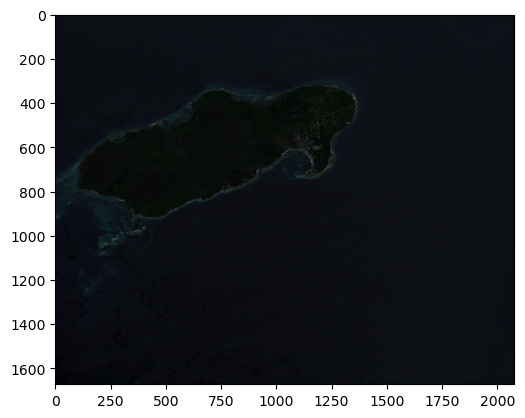

In [53]:
ImageHelper.plot_rgb(img_test, plot = True)

In [54]:
#img_test = ImageHelper.remove_channel(img_test, 10)
original_shape = img_test.shape

In [55]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [56]:
test_pred = bst.predict(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

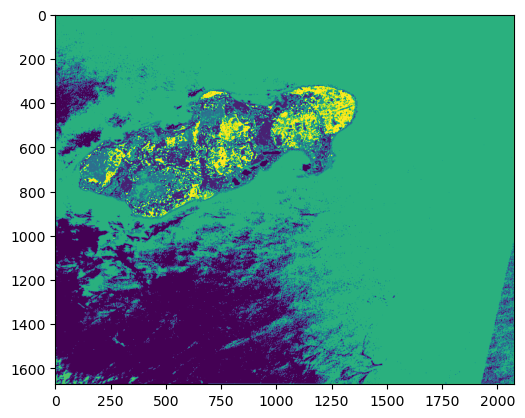

In [58]:
plt.imshow(test_pred)

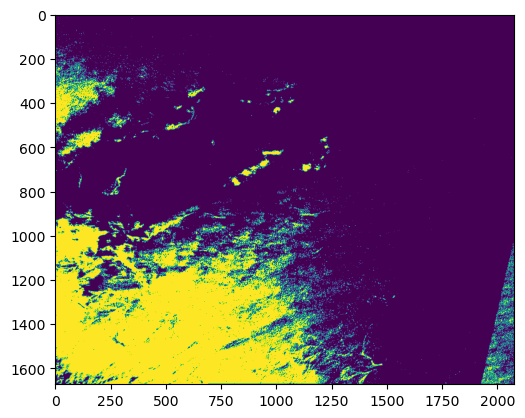

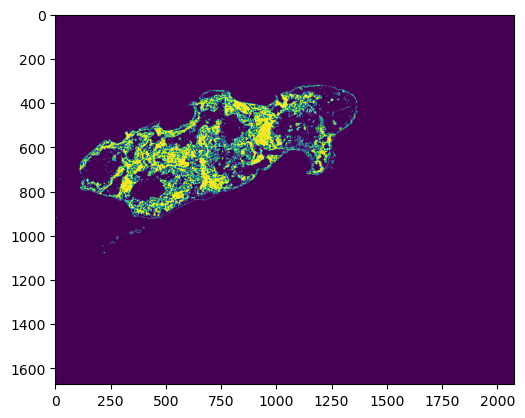

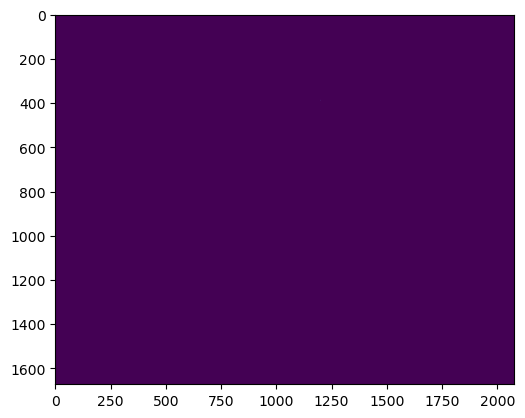

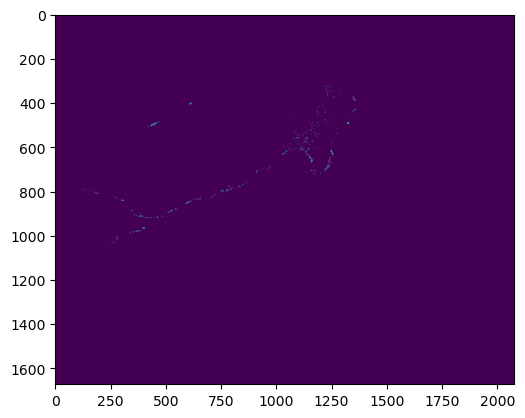

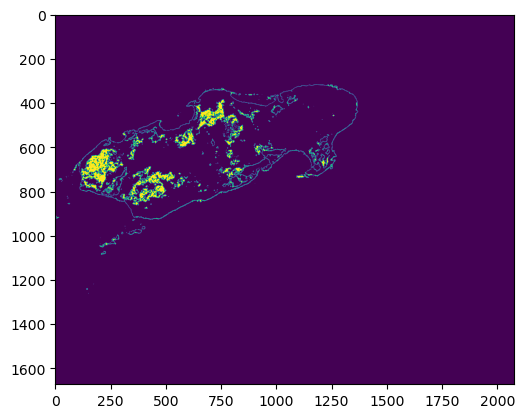

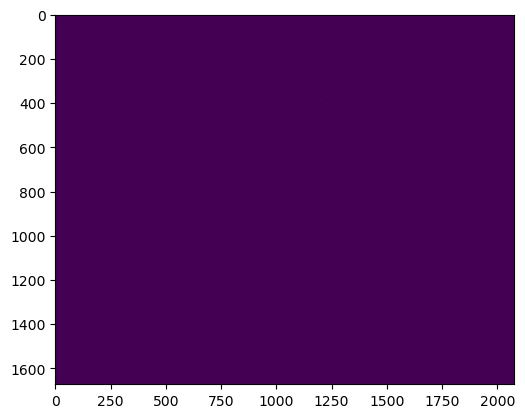

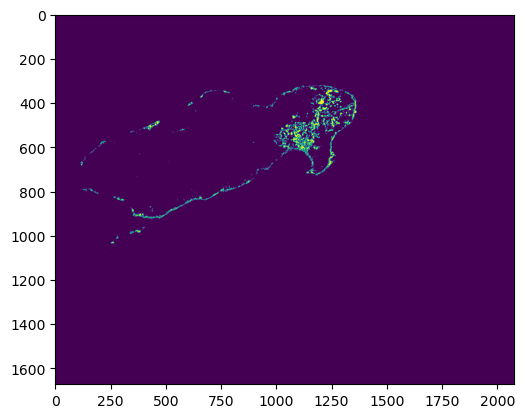

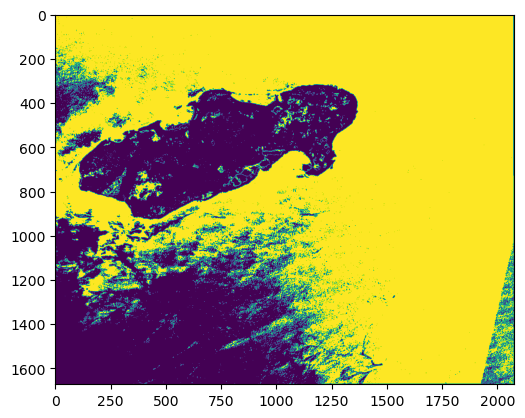

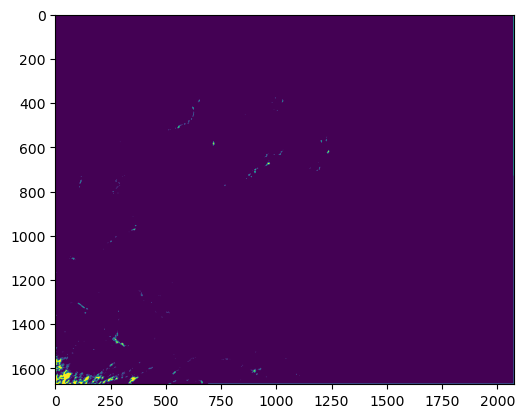

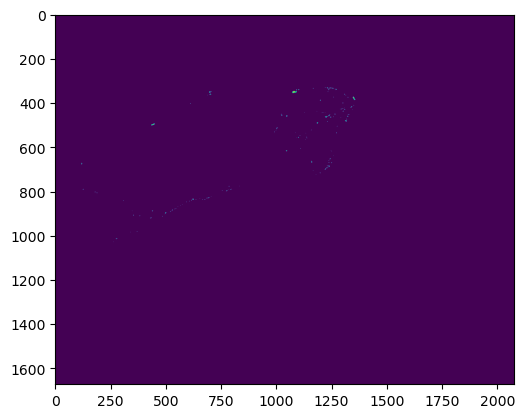

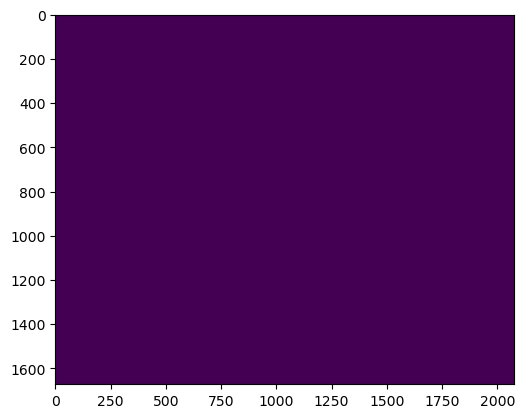

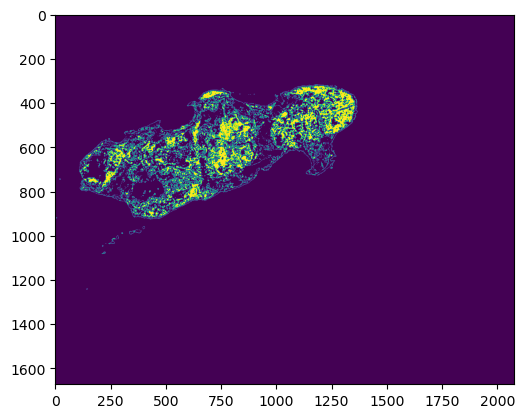

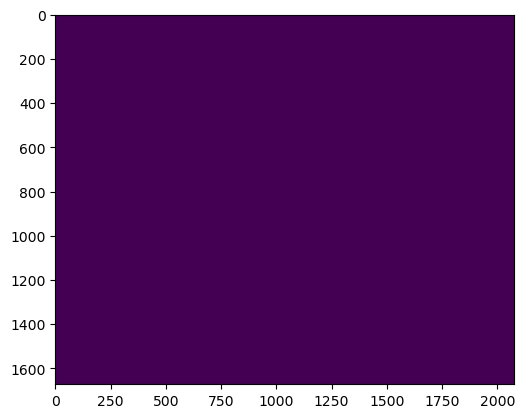

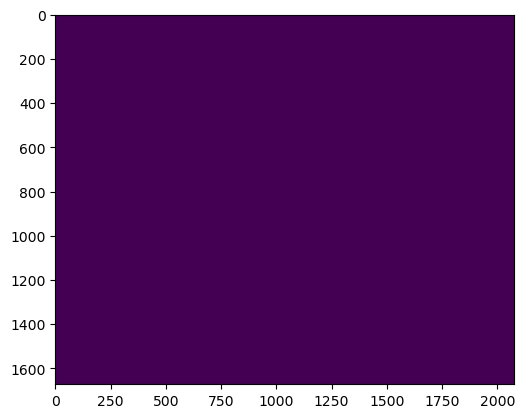

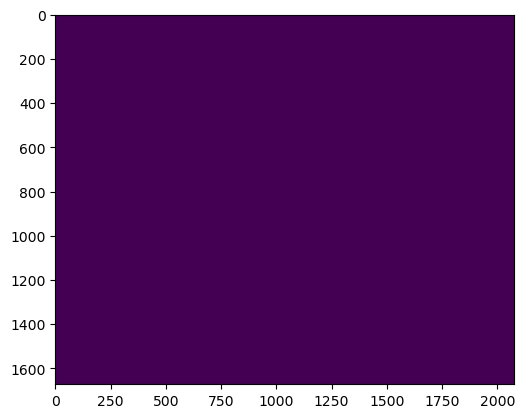

In [59]:
for i in range(15):

    plt.imshow(test_pred==i)
    plt.show()

In [60]:
bm = list(band_mapping.keys())
del bm[-3]

<Axes: >

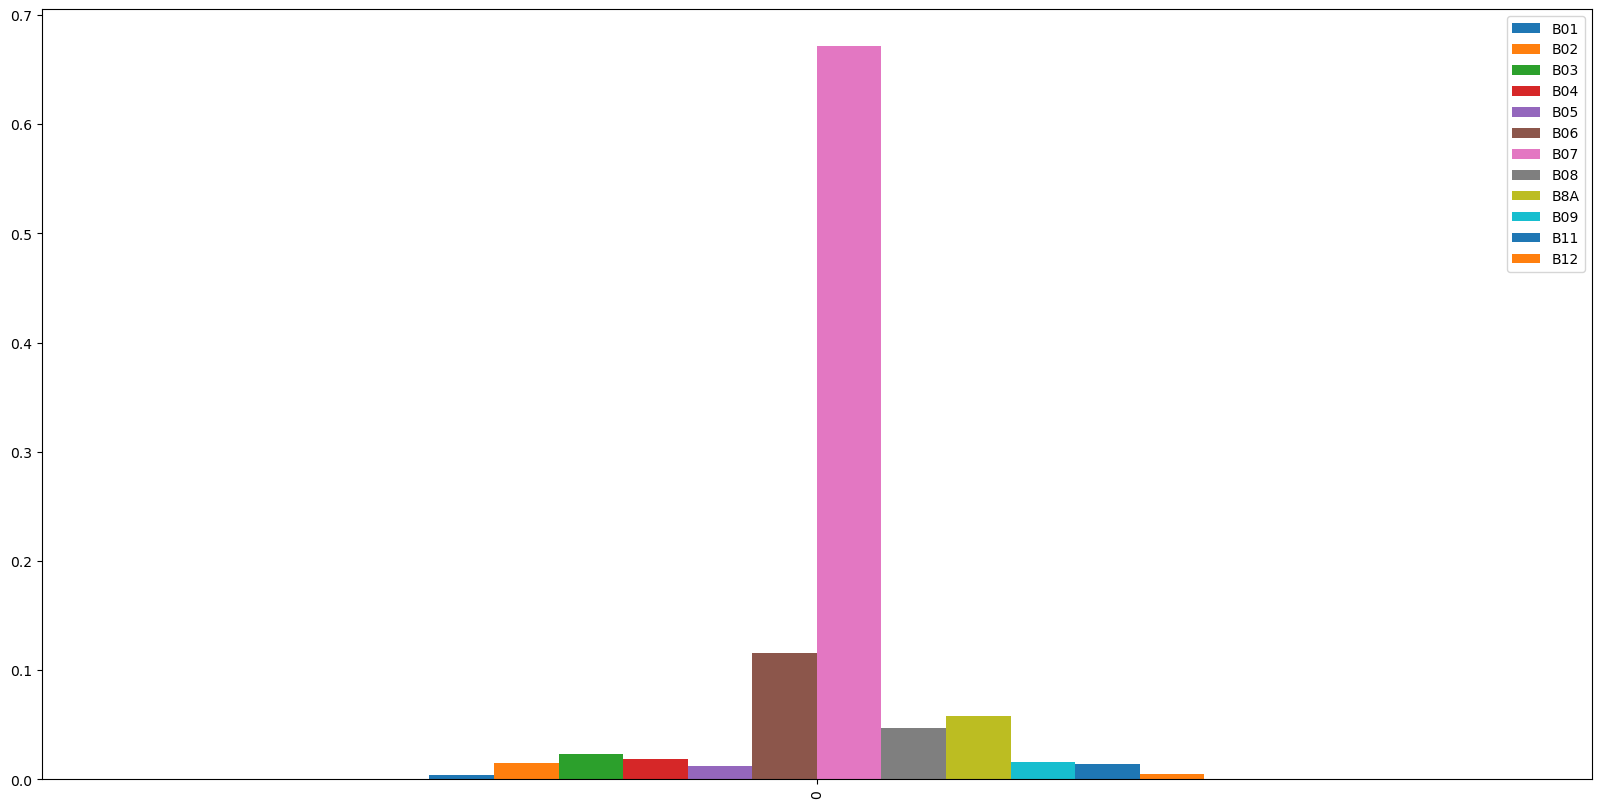

In [61]:
pd.DataFrame(np.expand_dims(bst.feature_importances_, axis = 1).T, columns = bm).plot(kind = 'bar', figsize = (20,10))